In [1]:
import pandas as pd
import numpy as np

In [2]:
with open('Names/names', 'r') as f:
    file = f.readlines()
    data = [" "+name[:-1] for name in file] #AGREGAMOS UN ESPACIO

In [3]:
print(len(data))
data

7944


[' Abagael',
 ' Abagail',
 ' Abbe',
 ' Abbey',
 ' Abbi',
 ' Abbie',
 ' Abby',
 ' Abigael',
 ' Abigail',
 ' Abigale',
 ' Abra',
 ' Acacia',
 ' Ada',
 ' Adah',
 ' Adaline',
 ' Adara',
 ' Addie',
 ' Addis',
 ' Adel',
 ' Adela',
 ' Adelaide',
 ' Adele',
 ' Adelice',
 ' Adelina',
 ' Adelind',
 ' Adeline',
 ' Adella',
 ' Adelle',
 ' Adena',
 ' Adey',
 ' Adi',
 ' Adiana',
 ' Adina',
 ' Adora',
 ' Adore',
 ' Adoree',
 ' Adorne',
 ' Adrea',
 ' Adria',
 ' Adriaens',
 ' Adrian',
 ' Adriana',
 ' Adriane',
 ' Adrianna',
 ' Adrianne',
 ' Adrien',
 ' Adriena',
 ' Adrienne',
 ' Aeriel',
 ' Aeriela',
 ' Aeriell',
 ' Ag',
 ' Agace',
 ' Agata',
 ' Agatha',
 ' Agathe',
 ' Aggi',
 ' Aggie',
 ' Aggy',
 ' Agna',
 ' Agnella',
 ' Agnes',
 ' Agnese',
 ' Agnesse',
 ' Agneta',
 ' Agnola',
 ' Agretha',
 ' Aida',
 ' Aidan',
 ' Aigneis',
 ' Aila',
 ' Aile',
 ' Ailee',
 ' Aileen',
 ' Ailene',
 ' Ailey',
 ' Aili',
 ' Ailina',
 ' Ailyn',
 ' Aime',
 ' Aimee',
 ' Aimil',
 ' Aina',
 ' Aindrea',
 ' Ainslee',
 ' Ainsley',
 

In [4]:
tokens =  list(set([letter for name in data for letter in name]))

tokens1 = []
for name in data:
    for letter in name:
        tokens1.append(letter)
tokens1 = set(tokens1)

print(len(tokens), len(tokens1))
assert len(tokens) == len(tokens1)

55 55


In [5]:
token_to_id = dict( [(token, i) for (i, token) in enumerate(sorted(tokens))] )

print(token_to_id)
print()
print(sorted(list(token_to_id.keys())))

{' ': 0, "'": 1, '-': 2, 'A': 3, 'B': 4, 'C': 5, 'D': 6, 'E': 7, 'F': 8, 'G': 9, 'H': 10, 'I': 11, 'J': 12, 'K': 13, 'L': 14, 'M': 15, 'N': 16, 'O': 17, 'P': 18, 'Q': 19, 'R': 20, 'S': 21, 'T': 22, 'U': 23, 'V': 24, 'W': 25, 'X': 26, 'Y': 27, 'Z': 28, 'a': 29, 'b': 30, 'c': 31, 'd': 32, 'e': 33, 'f': 34, 'g': 35, 'h': 36, 'i': 37, 'j': 38, 'k': 39, 'l': 40, 'm': 41, 'n': 42, 'o': 43, 'p': 44, 'q': 45, 'r': 46, 's': 47, 't': 48, 'u': 49, 'v': 50, 'w': 51, 'x': 52, 'y': 53, 'z': 54}

[' ', "'", '-', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [6]:
###APLICAMOS GET A CADA CARACTER DE LA CADENA, PARA SACAR EL ÍNDICE##
print(len(data[0]))
list(map(token_to_id.get, data[0]))

8


[0, 3, 30, 29, 35, 29, 33, 40]

In [23]:
###CREAMOS LA MATRIZ X###
max_len = max(map(len, data))
print(max_len)
X_temp = np.zeros((len(data), max_len), dtype=np.int32) ##Tamaño fijo de cadenas

for i, name in enumerate(data):
    if i < 5: print(name)
    X_temp[i, :len(name)] = list(map(token_to_id.get, name))
X = X_temp.T.copy()

print(X.shape)
print(X[:, :5].T)

16
 Abagael
 Abagail
 Abbe
 Abbey
 Abbi
(16, 7944)
[[ 0  3 30 29 35 29 33 40  0  0  0  0  0  0  0  0]
 [ 0  3 30 29 35 29 37 40  0  0  0  0  0  0  0  0]
 [ 0  3 30 30 33  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3 30 30 33 53  0  0  0  0  0  0  0  0  0  0]
 [ 0  3 30 30 37  0  0  0  0  0  0  0  0  0  0  0]]


In [10]:
import keras
from keras.layers import Concatenate,Dense,Embedding
import tensorflow as tf
import matplotlib.pyplot as plt

rnn_num_units = 64
embedding_size = 16
n_tokens = len(tokens)

#Let's create layers for our recurrent network
#Note: we create layers but we don't "apply" them yet

#Word2Vec
#Embede el caracter representado por el diccionario de 55 valores 
#a un espacio de 16 dimensiones
embed_x = Embedding(n_tokens, embedding_size) # an embedding layer that converts character ids into embeddings


#a dense layer that maps input and previous state to new hidden state, [x_t,h_t]->h_t+1
get_h_next = Dense(rnn_num_units, activation='elu') #W

#a dense layer that maps current hidden state to probabilities of characters [h_t+1]->P(x_t+1|h_t+1)
get_probas = Dense(n_tokens, activation='softmax') #V

#Note: please either set the correct activation to Dense or write it manually in rnn_one_step

In [24]:
def rnn_one_step(x_t, h_t):
    """
    x_t = (m,) = (7944,)
    h_t = (m, rnn_num_units) = (7944, 64)
    Recurrent neural network step that produces next state and output
    given prev input and previous state.
    We'll call this method repeatedly to produce the whole sequence.
    
    Follow inline isntructions to complete the function.
    """
    #convert character id into embedding
    #x_T: (7944,) -> reshape([-1,1]) = (1, 7944) -> [:,0] = (7944,64)
    x_t_emb = embed_x( tf.reshape(x_t, [-1,1]) )[:,0] #(7944,64)
    
    #concatenate x embedding and previous h state
    x_and_h = tf.concat([x_t_emb, h_t], 1) #(7944, 128)
    
    #compute next state given x_and_h
    h_next = get_h_next(x_and_h) #(7944, 64)
    
    #get probabilities for language model P(x_next|h_next)
    output_probas = get_probas(h_next) #(7944, 55)
    
    return output_probas,h_next

In [25]:
MAX_LENGTH = 16 #Maxima longitud de la cadena

input_sequence = tf.placeholder('int32',(MAX_LENGTH,None)) #(16,7944)
batch_size = tf.shape(input_sequence)[1]

predicted_probas = []
h_prev = tf.zeros([batch_size,rnn_num_units]) #initial hidden state

for t in range(MAX_LENGTH):
    #La primera letra de cada nombre del batch
    x_t = input_sequence[t] #(m,)
    probas_next,h_next = rnn_one_step(x_t,h_prev)
    
    h_prev = h_next
    predicted_probas.append(probas_next)
    
predicted_probas = tf.stack(predicted_probas) #(16, 7944, 55)

In [26]:
###LOSS & GRADS###
#(16, 7944, 55)
predictions_matrix = tf.reshape(predicted_probas[:-1],[-1,len(tokens)])
# -> (15*7944, 55) eliminamos el ultimo caracter de la pred

#(16*7944)
answers_matrix = tf.one_hot(tf.reshape(input_sequence[1:],[-1]), n_tokens) #One-hot-encoding
# -> (15*7944, 55) eliminamos el primer caracter y volvemos one hot

In [34]:
loss = tf.reduce_mean(tf.reduce_sum(-answers_matrix*tf.log(tf.clip_by_value(predictions_matrix,1e-10,1.0)), reduction_indices=[1])) ##<define loss as categorical crossentropy. Mind that predictions are probabilities and NOT logits!>

optimize = tf.train.AdamOptimizer().minimize(loss)

In [45]:
from IPython.display import clear_output
from random import sample
s = keras.backend.get_session()
s.run(tf.global_variables_initializer())
history = []

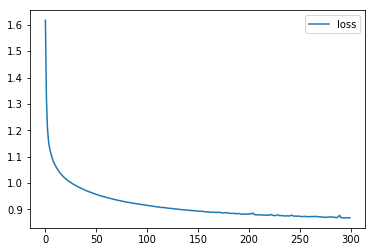

KeyboardInterrupt: 

In [46]:

for i in range(1000):
#     batch = to_matrix(sample(names,32),max_len=MAX_LENGTH)
    #print('i:', i)
    loss_batch = []
    for batch in range(int(X.shape[1]/32)+1):
        #print('batch range:', batch*32,(batch+1)*32)
        batch_x = X[:, batch*32:(batch+1)*32]
        
#         loss_i,_ = s.run([loss,optimize],{input_sequence:batch})
        loss_b,_ = s.run([loss,optimize],{input_sequence:batch_x})
        loss_batch.append(loss_b)


#     history.append(loss_i)
    history.append(sum(loss_batch)/len(loss_batch))
    if (i+1)%100==0:
        clear_output(True)
        plt.plot(history,label='loss')
        plt.legend()
        plt.show()
#     print(history[-1])
#     clear_output(True)
#     plt.plot(history,label='loss')
#     plt.legend()
#     plt.show()


assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."